### Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes.

The dataset was credited to Vina Spiehler in 1987.

The study of classification of types of glass was motivated by criminological investigation.

At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

### The columns in this dataset are:

1. RI: refractive index (RI is an index vaiable and has no units.)
2. Na: Sodium
3. Mg: Magnesium( Columns 3-9 are measured as weight percent in corresponding oxide.)
4. Al: Aluminum
5. Si: Silica
6. K:  Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron

### Target Variable:- Type of Glass has 6 classes:

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
5. containers
6. tableware
7. headlamps

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [224]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


#### Rename the column  names for further analysis and for better understanding

In [225]:
df.rename(columns = {"1":"Id number","1.52101":"RI","13.64":"Na","4.49":"Mg","1.10":"Al","71.78":"Si","0.06":"K","8.75":"Ca","0.00":"Ba","0.00.1":"Fe","1.1":"Type of glass"},inplace=True)
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [226]:
df.describe() 

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [228]:
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [229]:
df.isnull().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

### Observations

No null values

There is no difference between median(50%) and mean values for all the columns it means data is balanced

All varaibles are of numerical type

In [230]:
df.shape

(213, 11)

In [231]:
#removing unwanted column
df = df.drop("Id number",axis = True)

In [232]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')

In [183]:
df.columns.tolist()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [184]:
df.shape

(213, 10)

There are 213 rows and 10 columns out of which 1 coulumn is a target variable

In [185]:
#### To check the num of unique values in each column
df.nunique().to_frame('No of unique values')

,No of unique values
RI,177
Na,142
Mg,93
Al,117
Si,132
K,65
Ca,143
Ba,34
Fe,32
Type of glass,6


### Checking the categoreis of target column

In [186]:
df[ 'Type of glass'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [187]:
 df['Type of glass'].nunique()

6

In [188]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 177, dtype: int64


13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: Mg, Length: 93, dtype: int64


1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: Al, Length: 117, dtype: int64


72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: Si, Length: 132, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64


8.03    5
8.43    5
8.44    4
9.57    

We can see that in target variable ie 'Type of glass' there appears more existance of Glass Type 2

### Lets visualise it by count plot

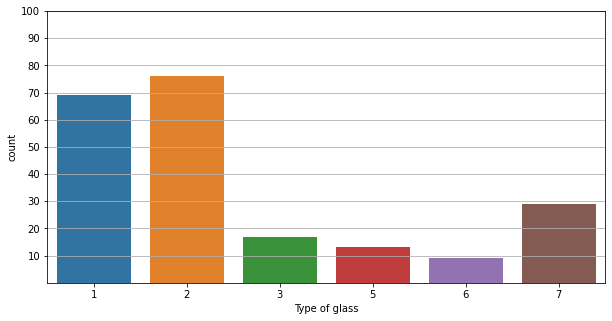

In [189]:
plt.figure(figsize=(10,5))
plt.grid()
sns.countplot(x='Type of glass', data = df)
plt.yticks(range(10,101,10))
plt.show()

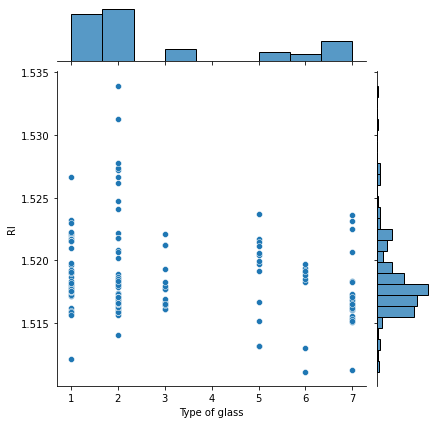

In [190]:
x = df['Type of glass']
y = df['RI']

sns.jointplot(x=x, y=y)

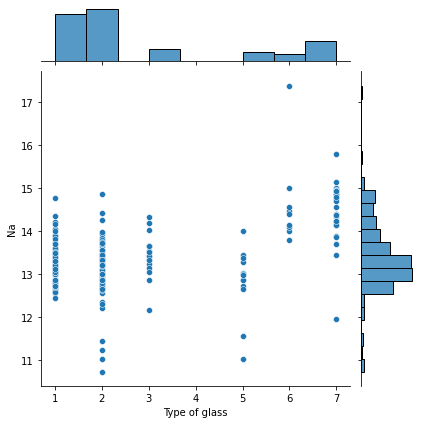

In [191]:
x = df['Type of glass']
y = df['Na']

sns.jointplot(x=x, y=y)

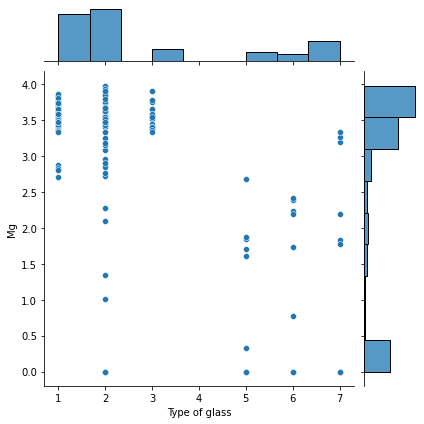

In [192]:
x = df['Type of glass']
y = df['Mg']

sns.jointplot(x=x, y=y)

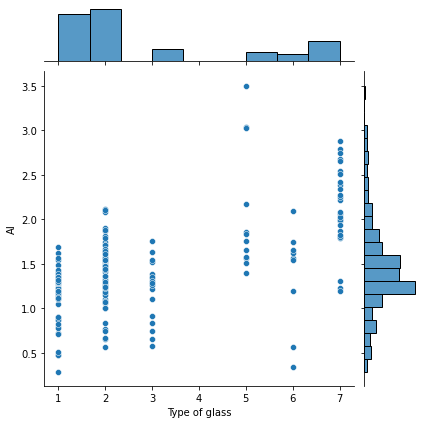

In [193]:
x = df['Type of glass']
y = df['Al']

sns.jointplot(x=x, y=y)

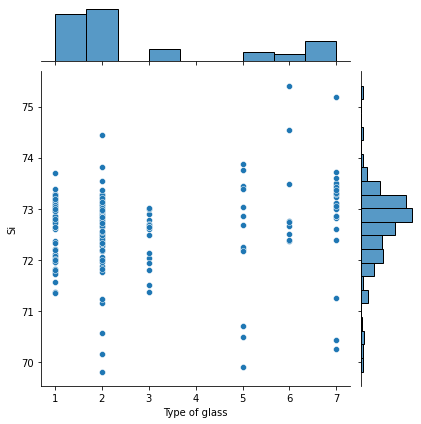

In [194]:
x = df['Type of glass']
y = df['Si']

sns.jointplot(x=x, y=y)

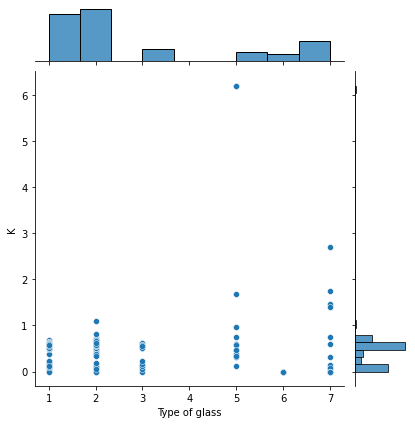

In [195]:
x = df['Type of glass']
y = df['K']

sns.jointplot(x=x, y=y)

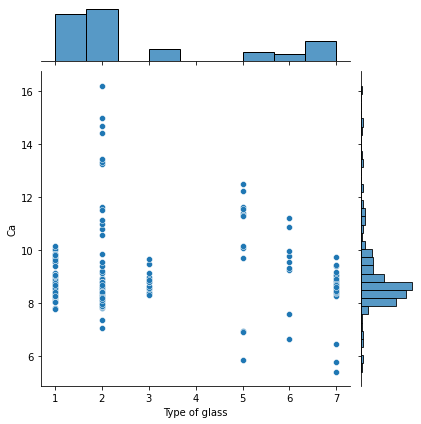

In [196]:
x = df['Type of glass']
y = df['Ca']

sns.jointplot(x=x, y=y)

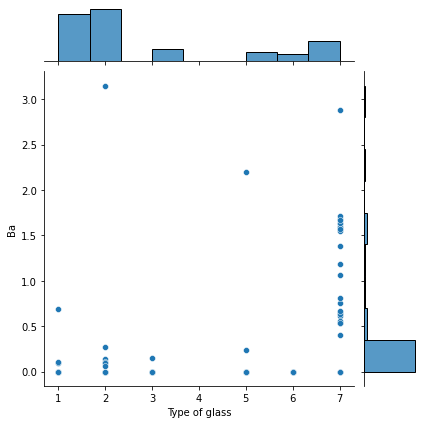

In [197]:
x = df['Type of glass']
y = df['Ba']

sns.jointplot(x=x, y=y)

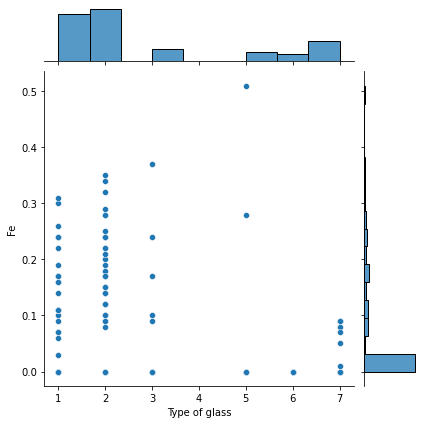

In [198]:
x = df['Type of glass']
y = df['Fe']

sns.jointplot(x=x, y=y)

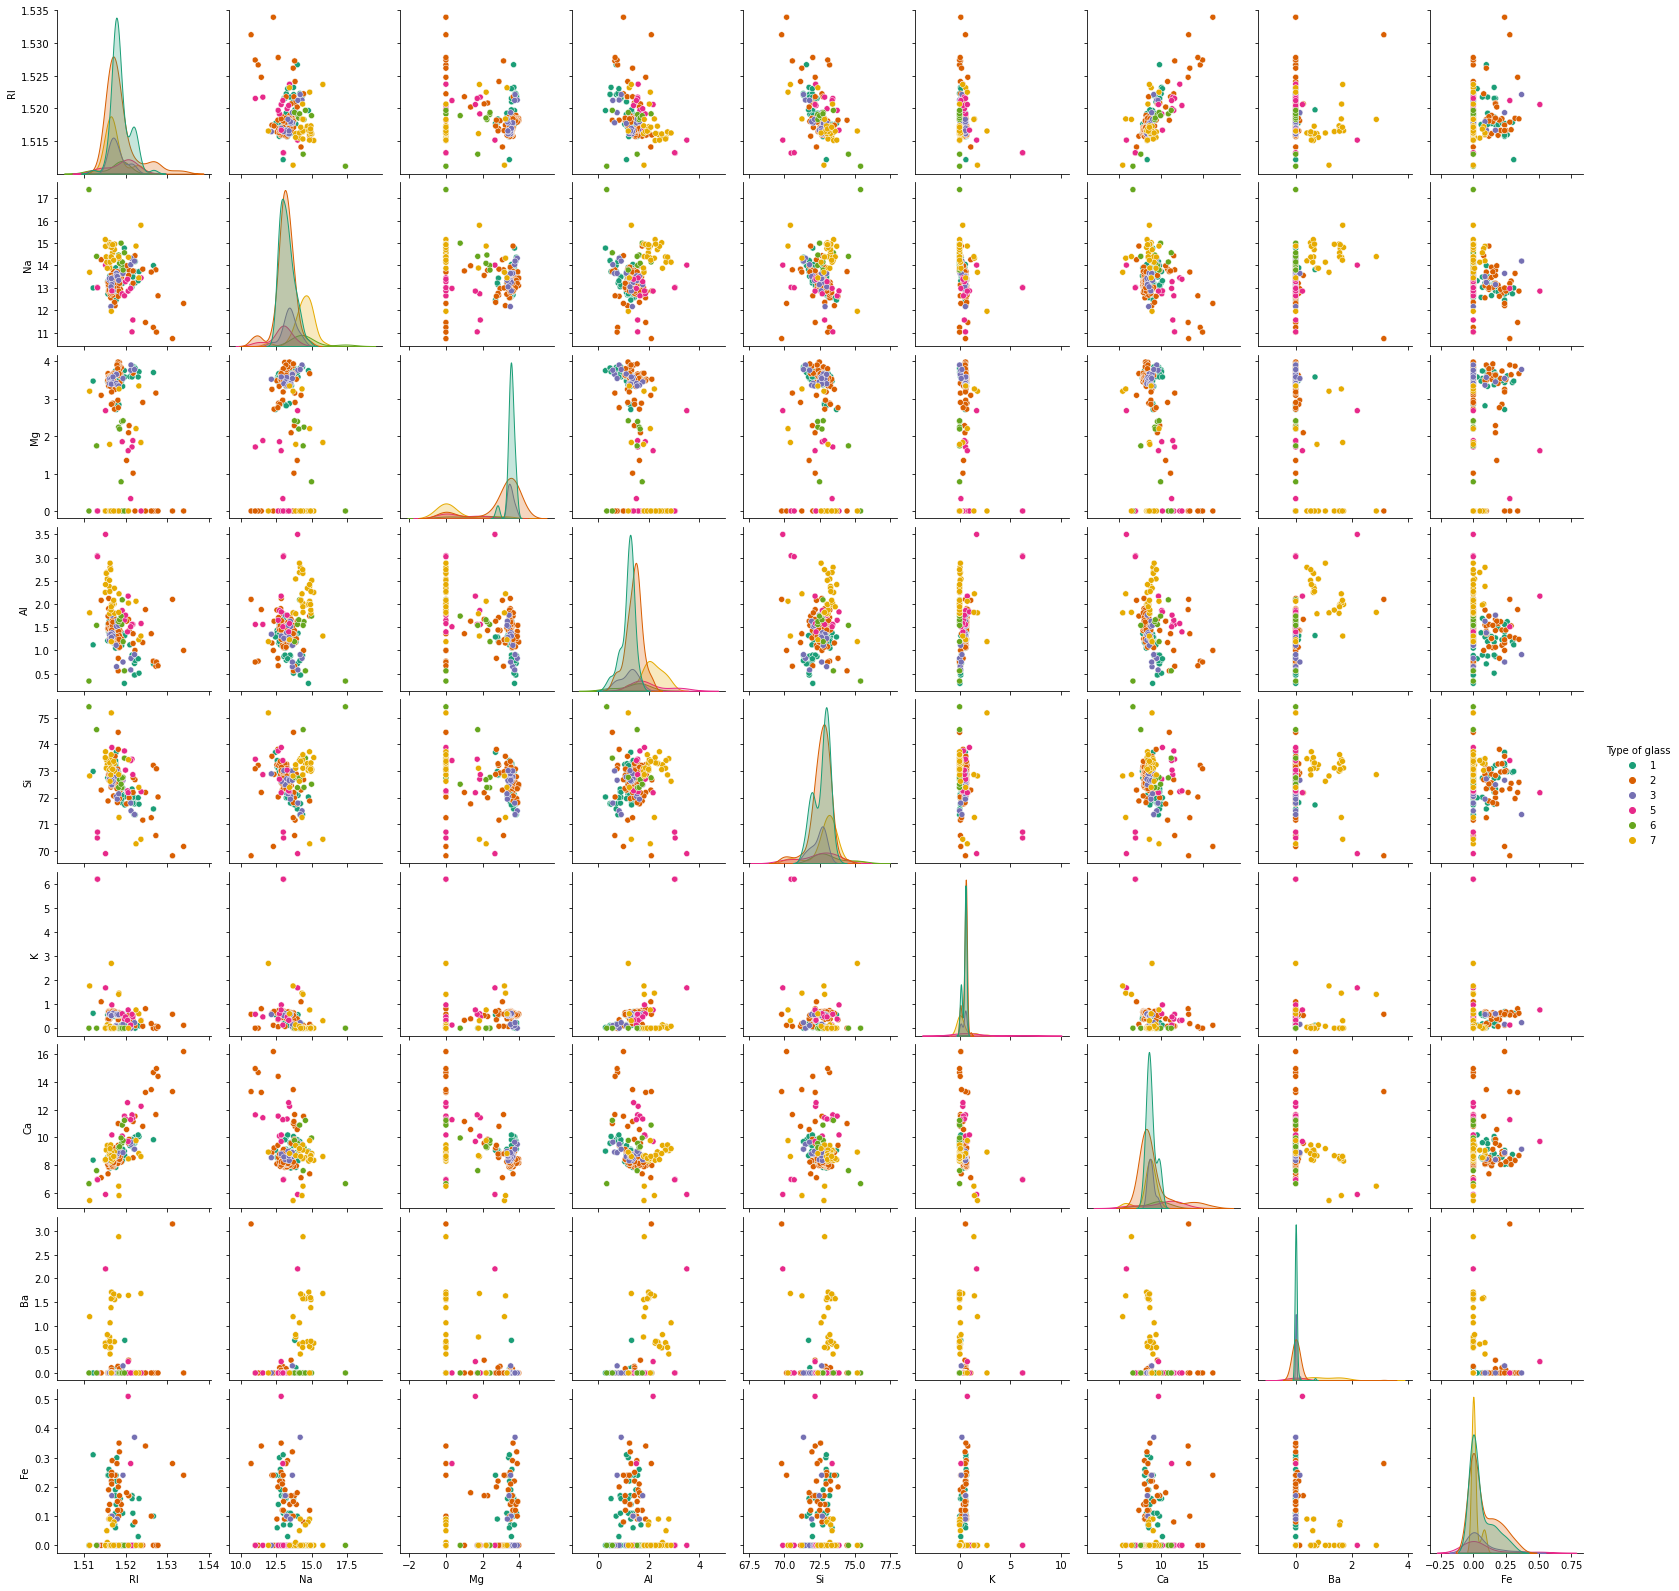

In [199]:
### Multivariate Analysis

sns.pairplot(df, hue = 'Type of glass', palette = 'Dark2')
plt.show()

### Checking outliers using boxplot

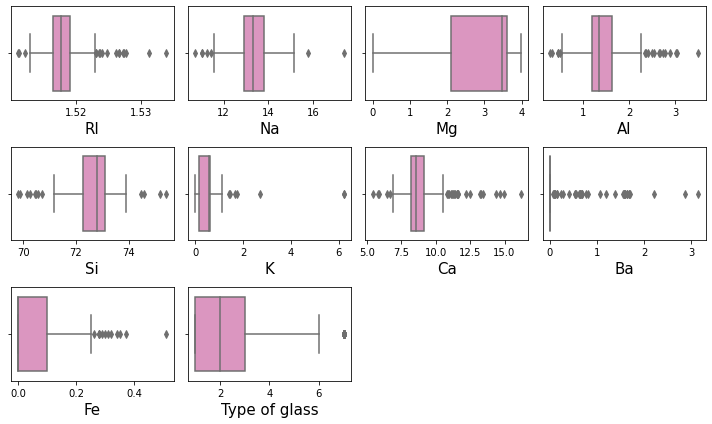

In [200]:

plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for columns in df:
    if plotnumber<= 10:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[columns],palette = "Set2_r")
        plt.xlabel(columns, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

### Checking for  skeweness



In [201]:
df.skew()

RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.406749
Fe               1.747173
Type of glass    1.108861
dtype: float64

In [233]:

#checking the correlation between features and the target:
cor = df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
Na,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Type of glass,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


### Visualize the correlation matrix by plotting heatmap


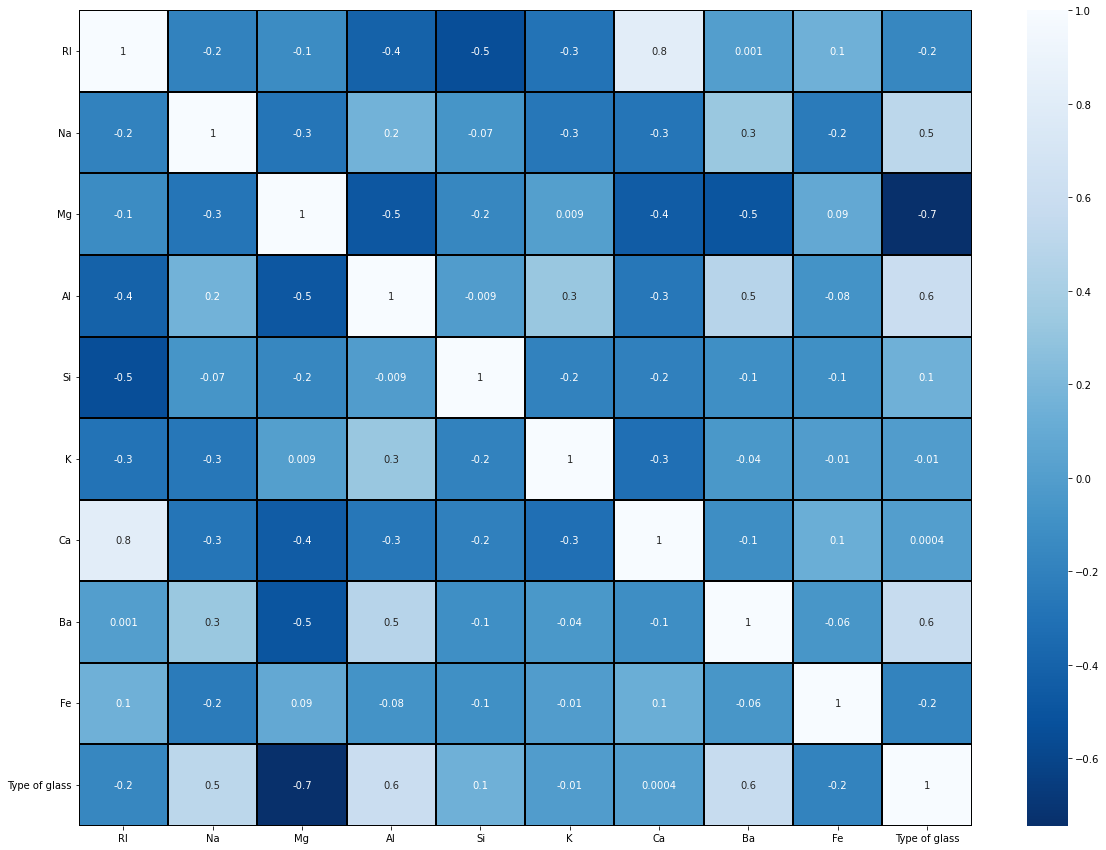

In [203]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation=0);
plt.show()

####  RI and Ca have a high positive correlation.

#### Si and RI, Mg and Al, Mg and Ba have negative correlation. 

### To fix the multicollinearity problem we r going to use PCA(Principle Component analysis) as it is a classification problem

In [234]:
from sklearn.decomposition import PCA  #Principle component Analysis
from sklearn.preprocessing import StandardScaler

#### Before applying PCA we have to standardise the data.

In [235]:
scaler = StandardScaler()
x = df.drop('Type of glass', axis=1)
x_scaled = scaler.fit_transform(x)

In [236]:
pca = PCA()

pca_1 = pca.fit_transform(x_scaled)

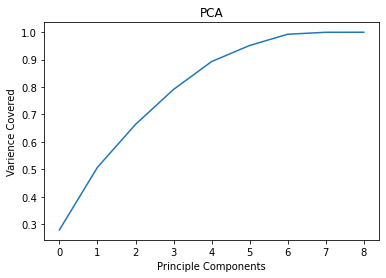

In [237]:
# Let's plot scree plot to check the best components

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#cumsum()-cumulative summation
plt.xlabel('Principle Components')
plt.ylabel('Varience Covered')
plt.title('PCA')
plt.show()

#### Out of From 9 features near about 6 are able to explain>99% variance, there is  need to apply dimension reductionality in this case

In [238]:
pca_red = PCA(n_components=6)
X_reduced = pca_red.fit_transform(x_scaled)

### Model Building

In [239]:
# Separating the considered labels and feature
X = X_reduced
y = df["Type of glass"].values

In [240]:
# Data split into tarin and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=225)


In [241]:
def print_score(clf, X_train, X_test, y_train, y_test, train = True):
    
    if train:
        y_pred = clf.predict(X_train)
        
        print('\n==================TRAIN RESULT=================')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%')
        
        
    elif train == False:
        
        pred = clf.predict(X_test)
        
        print('\n==================TEST RESULT====================')
        print(f'Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test,pred,digits=2))

### Support Vector Machines

In [242]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
svc = SVC()

#SVC Model training and pass printing train and test score
svc.fit(X_train,y_train)

# call the function and pass dataset to check train and test score
print_score(svc,X_train,X_test,y_train,y_test, train = True)  #For training score

print_score(svc,X_train,X_test,y_train,y_test, train = False)  #For testing score


==================TRAIN RESULT=================
Accuracy Score: 79.19%

==================TEST RESULT====================
Accuracy Score: 65.62%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.68      0.74      0.71        23
           2       0.45      0.67      0.54        15
           3       0.00      0.00      0.00         7
           5       0.75      0.75      0.75         4
           6       0.50      1.00      0.67         1
           7       1.00      0.79      0.88        14

    accuracy                           0.66        64
   macro avg       0.56      0.66      0.59        64
weighted avg       0.62      0.66      0.63        64



### XGBoost Classifier

In [213]:
!pip install xgboost

In [214]:
from sklearn.feature_selection import SelectPercentile, chi2

In [247]:
# Instantiate SelectPercentile and fit(feature, label)

x = df.drop(['Type of glass'], axis = 1)

y = df["Type of glass"].values

SPercentile = SelectPercentile(score_func = chi2, percentile = 80)

SPercentile = SPercentile.fit(x,y)

In [248]:
# Saperate the features tocheck p-values

cols = SPercentile.get_support(indices = True)  #to return index num instead of boolean
print('Feature index = ',cols)

features = x.columns[cols]
print('Features = ',list(features))


Feature index =  [1 2 3 5 6 7 8]
Features =  ['Na', 'Mg', 'Al', 'K', 'Ca', 'Ba', 'Fe']


In [249]:
df_scores = pd.DataFrame({'features':x.columns, 'chi2Score':SPercentile.scores_, 'pValue':SPercentile.pvalues_})
df_scores.sort_values(by = 'chi2Score', ascending=False)

,features,chi2Score,pValue
7,Ba,144.659991,1.827252e-29
2,Mg,100.413501,4.324160e-20
5,K,31.461011,7.594980e-06
3,Al,16.878718,4.735648e-03
1,Na,4.319534,5.043858e-01
6,Ca,3.206029,6.682563e-01
8,Fe,2.160581,8.265090e-01
4,Si,0.109786,9.997957e-01
0,RI,0.000047,1.000000e+00


### Note : We reject the null hypothesis when the pvalue is less than 0.05
### Let's print 80% of selected features

In [250]:
#### Create subset of selected features

x = df[features]

y = df["Type of glass"].values

In [251]:
# Import libraries

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)


x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.3, random_state=42)

In [252]:

from xgboost import XGBClassifier
xgbc = XGBClassifier()

#SVC Model training and pass printing train and test score
xgbc.fit(X_train,y_train)

# call the function and pass dataset to check train and test score
print_score(xgbc,X_train,X_test,y_train,y_test, train = True)  #For training score

print_score(xgbc,X_train,X_test,y_train,y_test, train = False)  #For testing score

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [1 2 3 5 6 7]

###  Gradient Boost Classifier

In [244]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


gbc = GradientBoostingClassifier()
#GradientBoostingClassifier Model training and pass printing train and test score
gbc.fit(X_train,y_train)

# call the function and pass dataset to check train and test score
print_score(gbc,X_train,X_test,y_train,y_test, train = True)  #For training score

print_score(gbc,X_train,X_test,y_train,y_test, train = False)  #For testing score


==================TRAIN RESULT=================
Accuracy Score: 100.00%

==================TEST RESULT====================
Accuracy Score: 67.19%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.66      0.83      0.73        23
           2       0.53      0.60      0.56        15
           3       0.00      0.00      0.00         7
           5       0.75      0.75      0.75         4
           6       0.50      1.00      0.67         1
           7       0.92      0.79      0.85        14

    accuracy                           0.67        64
   macro avg       0.56      0.66      0.59        64
weighted avg       0.61      0.67      0.64        64



### Random Forest

In [245]:
rfc = RandomForestClassifier()
#GradientBoostingClassifier Model training and pass printing train and test score
rfc.fit(X_train,y_train)

# call the function and pass dataset to check train and test score
print_score(rfc,X_train,X_test,y_train,y_test, train = True)  #For training score

print_score(rfc,X_train,X_test,y_train,y_test, train = False)  #For testing score


==================TRAIN RESULT=================
Accuracy Score: 100.00%

==================TEST RESULT====================
Accuracy Score: 68.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.70      0.83      0.76        23
           2       0.52      0.73      0.61        15
           3       0.00      0.00      0.00         7
           5       1.00      0.50      0.67         4
           6       0.50      1.00      0.67         1
           7       0.92      0.79      0.85        14

    accuracy                           0.69        64
   macro avg       0.61      0.64      0.59        64
weighted avg       0.65      0.69      0.65        64



### Decision Tree

In [246]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
#GradientBoostingClassifier Model training and pass printing train and test score
dtc.fit(X_train,y_train)

# call the function and pass dataset to check train and test score
print_score(dtc,X_train,X_test,y_train,y_test, train = True)  #For training score

print_score(dtc,X_train,X_test,y_train,y_test, train = False)  #For testing score


==================TRAIN RESULT=================
Accuracy Score: 100.00%

==================TEST RESULT====================
Accuracy Score: 64.06%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.73      0.70      0.71        23
           2       0.50      0.67      0.57        15
           3       0.25      0.14      0.18         7
           5       0.67      0.50      0.57         4
           6       0.33      1.00      0.50         1
           7       0.92      0.79      0.85        14

    accuracy                           0.64        64
   macro avg       0.57      0.63      0.56        64
weighted avg       0.65      0.64      0.64        64



Gradient Boost Classifier gives the highest accuracy and all the features seem to be important from the other models. So, we will retain Gradient Boost as our final model and perform hyperparameter tuning to improve it.

### Hyperparameter tuning

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

grid_param = {
    'max_depth' : range(4,8),
    'min_samples_split' : (2,8,2),
    'learning_rate' : np.arange(0.1,0.3)
}

In [260]:
grid = GridSearchCV( GradientBoostingClassifier(), param_grid = grid_param)

grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': (2, 8, 2)})

In [261]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 8}

In [271]:
gbc = GradientBoostingClassifier(
    max_depth = 6, min_samples_split = 8, learning_rate = 0.1)

gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=6, min_samples_split=8)

In [272]:
# Call the function and pass the dataset to check the train and test score
print_score(gbc,x_train,x_test,y_train,y_test,train=True)   #For training score


print_score(gbc,x_train,x_test,y_train,y_test,train=False)   #For testing score


==================TRAIN RESULT=================
Accuracy Score: 100.00%

==================TEST RESULT====================
Accuracy Score: 67.19%

 
 Test Classification Report 
               precision    recall  f1-score   support

           1       0.58      0.78      0.67        18
           2       0.68      0.62      0.65        24
           3       0.50      0.50      0.50         4
           5       0.50      0.50      0.50         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.67        64
   macro avg       0.71      0.63      0.66        64
weighted avg       0.70      0.67      0.68        64



In [264]:
df.tail(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
211,1.51651,14.38,0.0,1.94,73.61,0.0,8.48,1.57,0.0,7
212,1.51711,14.23,0.0,2.08,73.36,0.0,8.62,1.67,0.0,7


### Predict the charges from given features

In [266]:
print('Type of glass : ',gbc.predict(scaler.transform([[14.38, 0.0, 1.94,73.61,0.0,8.48,1.57]])))

Type of glass :  [5]


### Conclusion

### As the GradientBoostingClassifier gives the higher accuracy so it is good model for the prediction of a Type of Glass